# Homework 2

Sairisheek Muttukuru
**DUE NOV 11th at 11:59 PM**

You are expected to turn in a **pdf version** of this notebook with all your **codes, results, and figures** (Use the print option). Make sure the figures and results are visible as you want them to appear in the pdf before turning it in. Please do not modify the instructions as doing so will limit our ability to follow and grade your answers.

## Problem 1 (HW1 Problem 4)

In this problem, you will work on the clustering problem using Bottom-up Agglomerative clustering and K-mean clustering.

a) A 4-D dataset is given in **'iris.csv'** with the last column being the ground truth label. Load the file. Store the data in a variable ***X*** and store the label in a variable ***y***. Because clustering is an unsupervised task, there is no need for the labels during training.

In [147]:
import numpy as np
import pandas as pd

dataset = pd.read_csv("iris.csv")
X = dataset.iloc[:,:-1].to_numpy()
y = dataset.iloc[:,-1].to_numpy()

b) Train a clustering model using Bottom-up Agglomerative clustering.

In [148]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_


Visualize your clusters on a 2-D plot. Choose any 2 dimensions from the 4 dimensions to plot. Try to pick the 2 dimensions that best separate the data. Your plot should contains all the data points with points from the same predicted cluster haveing the same color. 

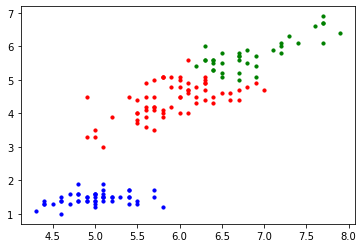

In [149]:

from matplotlib import pyplot as plt
plt.scatter(X[labels==0, 0], X[labels==0, 2], s=10, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 2], s=10, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 2], s=10, marker='o', color='green')  

plt.show()

Repeat the visualization step above using the same 2 dimensions. This time, plot according to the ground truth classes. Comment on the performance of your model. The model performed well, but it was not able to classify vertain instances that were interleaved green-red.

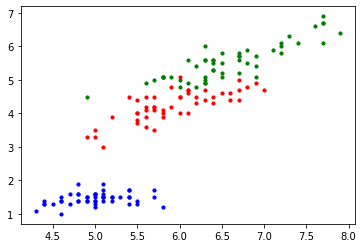

In [150]:
for x in range(y.size): 
    if y[x] == 'Setosa':  
        myplant = 'blue' 
    elif y[x] == 'Versicolor': 
        myplant= 'red'  
    else: 
        myplant= 'green' 
    
    plt.scatter(X[x][0], X[x][2], s=10, marker='o', color=myplant)

c) Train a clustering model using K-mean clustering.

In [151]:
from sklearn.cluster import KMeans   
kmodel = KMeans(n_clusters=3, random_state=0).fit(X)
klabels = kmodel.labels_

Visualize your clusters on a 2-D plot. Choose any 2 dimensions from the 4 dimensions to plot. Try to pick the 2 dimensions that best separate the data. Your plot should contains all the data points with points from the same predicted cluster haveing the same color.

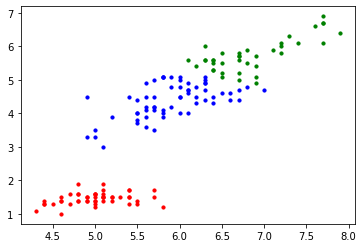

In [152]:
plt.scatter(X[klabels==0, 0], X[klabels==0, 2], s=10, marker='o', color='red')
plt.scatter(X[klabels==1, 0], X[klabels==1, 2], s=10, marker='o', color='blue')
plt.scatter(X[klabels==2, 0], X[klabels==2, 2], s=10, marker='o', color='green')  

plt.show()

Repeat the visualization step above using the same 2 dimensions. This time, plot according to the ground truth classes. Comment on the performance of your model. K-means produced tighter clusters, which are well defined. The ground truth seems to have lots of noise.

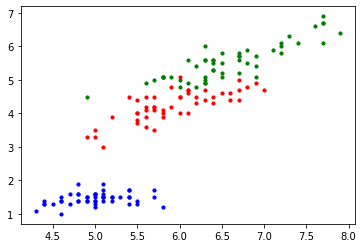

In [159]:
for x in range(y.size): 
    if y[x] == 'Setosa':  
        myplant = 'blue' 
    elif y[x] == 'Versicolor': 
        myplant= 'red'  
    else: 
        myplant= 'green' 
    
    plt.scatter(X[x][0], X[x][2], s=10, marker='o', color=myplant)


d) Perform Principle Component Analysis (PCA) on the data. Project the original data on the 2 largest principle components. Store this new projected 2-D data in a variable ***X_projected***.

In [154]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_projected = pca.fit_transform(X)


Repeat part **b** on the new 2-D data. Train the Bottom-up Agglomerative model and visualize your results.

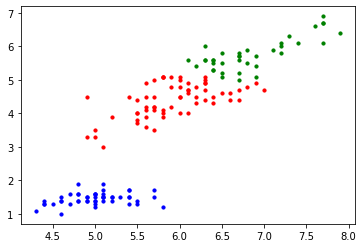

In [155]:
xmodel = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward').fit(X_projected)
xlabels = xmodel.labels_        
plt.scatter(X[xlabels==0, 0], X[xlabels==0, 2], s=10, marker='o', color='red')
plt.scatter(X[xlabels==1, 0], X[xlabels==1, 2], s=10, marker='o', color='blue')
plt.scatter(X[xlabels==2, 0], X[xlabels==2, 2], s=10, marker='o', color='green')  

plt.show()

Repeat part **c** on the new 2-D data. Train the K-means model and visualize your result.

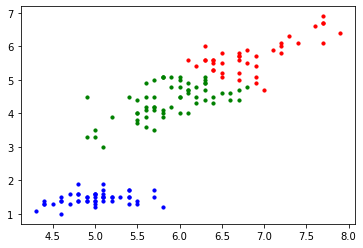

In [126]:
xkmodel = KMeans(n_clusters=3, random_state=0).fit(X_projected)
xklabels = xkmodel.labels_    
plt.scatter(X[xklabels==0, 0], X[xklabels==0, 2], s=10, marker='o', color='blue')
plt.scatter(X[xklabels==1, 0], X[xklabels==1, 2], s=10, marker='o', color='red')
plt.scatter(X[xklabels==2, 0], X[xklabels==2, 2], s=10, marker='o', color='green')  
plt.show()

Compare the quality of 4-D and 2-D clusterings. When would the ideas of projection and dimensionality reduction be useful?

Higher dimensional clusterings are harder to visualize, and learning algortihms take longer, as there are more dimensions (the search space expands exponentially) Dimensionality reduction allows us to represent the relevant features in a compact form. 

## Problem 2

In this problem, you will first implement the Naive Bayes (NB) algorithm from scratch. We will use a dataset for classifying if a patient has breast cancer. Each instance (row) in the dataset is a patient described by the 9 following features (with their corresponding values).

1. Clump Thickness: 1 - 10
2. Uniformity of Cell Size: 1 - 10
3. Uniformity of Cell Shape: 1 - 10
4. Marginal Adhesion: 1 - 10
5. Single Epithelial Cell Size: 1 - 10
6. Bare Nuclei: 1 - 10
7. Bland Chromatin: 1 - 10
8. Normal Nucleoli: 1 - 10
9. Mitoses: 1 - 10

Given these features, we will classify a car into one of the 2 classes: 0 (benign) or 1 (malignant).

NB is a very simple algorithm. Consider a feature **X**. For each value **$x_i$** of **X** and each class label **$y_j$**, NB calculates the value of $P(X = x_i | Y = y_j)$. For example, take the feature **Mitoses**, NB will calculate all the following values:

- P(Mitoses = 1 | Class = 0), P(Mitoses = 2 | Class = 0), P(Mitoses = 3 | Class = 0), ... , P(Mitoses = 10 | Class = 0)
- P(Mitoses = 1 | Class = 1), P(Mitoses = 2 | Class = 1), P(Mitoses = 3 | Class = 1), ... , P(Mitoses = 10 | Class = 1)

Repeat this calculation for all the features. In the end, NB keep a recording of all possible $P(X | Y)$. The calculation itself is intuitive:

$$
 P(X = x_i | Y = y_j) = \frac{\text{Number of rows with } X = x_i \text{ and } Y = y_j}{\text{Number of rows with } Y = y_j}
$$

In addition, NB also calculate the priors probability $P(Y = y_j)$. Again, intuitively:

$$
 P(Y = y_i) = \frac{\text{Number of rows with } Y = y_j}{\text{Number of rows in the dataset}}
$$

Given a test example $X_{test} = \{ X_0 = x_0, X_1 = x_1, \ldots, X_i = x_i\}$, for each class label $y_j$, NB calculate:

$$
\begin{align}
 P(Y = y_j | X_{test}) & = P(X_{test} | Y = y_j)P(Y = y_j) \\
                       & = P(X_0 = x_0 | Y = y_j)P(X_1 = x_1 | Y = y_j) \ldots P(X_i = x_i | Y = y_j)P(Y = y_j)
\end{align}
$$

Such calculation is easy since we have bookkept all $P(X | Y)$ and all $P(Y)$ in previous steps. The output of the model is simply:

$$
 \underset{y_j}{\operatorname{argmax}} P(Y = y_j | X_{test})
$$

You will do each of these steps following this problem. We will use Pandas to deal with the data in this problem. Pandas can do queries like "Get all the rows in which Clump Thickness = 2 and Class = 1" with minimal syntax.


a) First let's load the dataset and store it in a Pandas dataframe. Play with the dataframe and get used to the queries (this part is not graded). This guide is a good place to start:

https://medium.com/python-in-plain-english/filtering-rows-and-columns-in-pandas-python-techniques-you-must-know-6cdfc32c614c 

Split the dataset into a training set and a testing set. Use 10% of the data as the testing set (The splitting is graded).

In [138]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
dataset = pd.read_csv('breast-cancer-wisconsin.csv')
X = dataset.iloc[:,:-1].to_numpy()
y = dataset.iloc[:,-1].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

b) Now we will build up the bookkeeping. Let's start with the priors $P(Y = y_j)$, $y_j \in$ {0,1}. For each of these labels, calculate $P(Y = y_j)$ by simply counting the number of times $y_j$ appears in the dataset divided by the size of the dataset. You can bookkeep the priors in a dictionary with keys being $y_j$.

In [139]:
priors = np.zeros(2)
n = y_train.size
yn = np.array([y_train[y_train==0].size, y_train[y_train==1].size])
priors = yn/n
train_set = np.hstack((X_train, y_train[:,np.newaxis]))

Now let's calculate the conditional probability $P(X = x_i | Y = y_j)$. If you do the query with Pandas, this counting should be simple. This time, store the conditional probability in another dictionary with keys ($x_i$, $y_j$) or any data structure that you prefer. 

In [140]:
k = X.shape[1] 
cond = np.zeros((priors.size, k, 10))
for i in range(priors.size):
    for j in range(k):
        for l in range(10):
            fil = train_set[train_set[:,j] == l+1]
            cond[i,j,l] = fil[fil[:,-1]==i].shape[0]/yn[i]

That's it! You have successfully "trained" a NB model. Let's test our model on the test dataset.

Implement a **predict** function that returns $\underset{y_j}{\operatorname{argmax}} P(Y = y_j | X_{test})$ (refer to the description above). 

In [141]:
def predict(x_t):
    probs = np.ones(2)
    for i in range(probs.size):
        for j in range(x_t.size):
            probs[i] *= cond[i,j,x_t[j]-1]
        probs[i] *= priors[i]
    return np.argmax(probs)

Predict the label of all the instances in the test dataset, calculate and print out the accuracy.

In [142]:
from sklearn.metrics import accuracy_score
y_hat = np.zeros(y_test.size)
i = 0
for x_t in X_test:
    y_hat[i] = predict(x_t)
    i += 1
print(accuracy_score(y_test, y_hat))
    

0.9714285714285714


## Problem 3

In this problem, you will implement the Logistic Regression (LR) algorithm from scratch. Similar to NB, LR relies on $P(Y|X)$ to predict the class of an example. However, unlike NB, a generative model, LR is a discriminative model so it does not need to estimate $P(X|Y)$ and $P(Y)$. LR assumes the form of the conditional probability $P(Y|X)$ to be:

$$
    P(Y | X) = f(X) = \frac{1}{1 + e^{-(\alpha X + \beta)}}
$$

$f(X)$ returns a value in (0,1). The model classifies $X$ as $1$ if $f(X)$ is closer to $1$ and $0$ otherwise. We have to estimate the model parameters: the vector $\alpha$ and $\beta$ from the data, which we will do via stochastic gradient descent (SGD). In SGD, a training example is shown to the model each at a time. The model makes a prediction on the training example and the error between the prediction and the ground-truth label is used to update the model's parameters. We use the log-likelihood loss to estimate the error in this problem. In particular, the log-likelihood loss for classifying the $X^{(i)}$ example with the ground-truth $y^{(i)}$ is: 

$$
    LL(y^{(i)},f(X^{(i)})) = -(y^{(i)} \log(f(X^{(i)})) + (1 - y^{(i)}) \log(1 - f(X^{(i)})))
$$

In our case, the updating is as the followings:

$$
\alpha_{j}(t+1) = \alpha_{j}(t) - \frac{\partial LL}{\partial \alpha_j} \times rate
$$

$$
\beta(t+1) = \beta(t) - \frac{\partial LL}{\partial \beta} \times rate
$$

where $rate$ is the how much change we want to make to the parameters in each update. Whenever we finish looping through all the instances in the dataset to update the parameters, we finish a training epoch. We may do many training epochs (looping through the dataset many times), until the model parameters converge.

First, we need to derive the formula for $\frac{\partial LL}{\partial \alpha_j}$ and $\frac{\partial LL}{\partial \beta}$. To keep the problem simple, these are provided to you:

$$
    \frac{\partial LL}{\partial \alpha_j} = -(y^{(i)} - f(X^{(i)}))X^{(i)}_{j}
$$

$$
    \frac{\partial LL}{\partial \beta} = -(y^{(i)} - f(X^{(i)}))
$$

a) We use the same dataset for predicting breast cancer in Problem 2 for this problem. Load the dataset and split it into a training set and a testing set.

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
dataset = pd.read_csv('breast-cancer-wisconsin.csv')
X = dataset.iloc[:,:-1].to_numpy()
y = dataset.iloc[:,-1].to_numpy()
d = X_train.shape[1]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)


b) Learn the model parameters using SGD. A skeleton for SGD is provided to help you understand the process (You don't have to use the provided code). 

In [37]:
epochs = 15
rate = 0.01
alpha = np.zeros(d)
beta = 0

def predict(x_t):
    return 1/(1 + np.exp(-1*(np.dot(alpha,x_t) + beta)))

for epoch in range(epochs):
    # for instance in traning dataset:
    for ix in range(X_train.shape[0]):
        x_t = X_train[ix]
        y_hat = predict(x_t)
        alpha += rate*(y_train[ix] - y_hat)*x_t
        beta += rate*(y_train[ix] - y_hat)
        # Update parameters

c) Load the testing dataset. Use $f(X)$ to predict the labels of the test instances. Calculate the accuracy.

In [38]:
from sklearn.metrics import accuracy_score
y_pred = np.apply_along_axis(predict, 1, X_test)
y_pred = y_pred > 0.5
print(accuracy_score(y_pred, y_test))

0.9285714285714286


## Problem 4

In this problem, you will investigate how the size of the training data on the performance of a generative model (NB) and a discriminative model (LR). **You are free to use scikit-learn's NB and LR.** 

a) Load the breast cancer training dataset and split it into a training set and a testing set. 

In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
dataset = pd.read_csv('breast-cancer-wisconsin.csv')
X = dataset.iloc[:,:-1].to_numpy()
y = dataset.iloc[:,-1].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

b) We will train NB classifiers that use only a portion of the training data. Let's vary this portion from 1% to 100% of the training set (100 iterations). For each portion value, sample the training set according to the portion, train a NB classifer on this portion of the training set, and evaluate the model accuracy on the testing set.  

In [111]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lrclf = LogisticRegression()
nbclf = MultinomialNB(alpha=0.5, class_prior=priors)
lracc = np.zeros(100)
nbacc = np.zeros(100) 
threshs = np.linspace(0.01,1,100)
for ix,thresh in np.ndenumerate(threshs):
    if(thresh == 1):
        X_train_sub = X_train
        y_train_sub = y_train
    else:
        X_train_sub, _, y_train_sub, _ = train_test_split(X_train,y_train, train_size=thresh)
    nbclf.fit(X_train_sub, y_train_sub)
    lrclf.fit(X_train_sub, y_train_sub)
    nbacc[ix] = accuracy_score(nbclf.predict(X_test),y_test)
    lracc[ix] = accuracy_score(lrclf.predict(X_test),y_test)
    

Plot the accuracies of the models versus the portion of the training set used. Comment on the effect of increasing the size of the training dataset on the performance of NB.

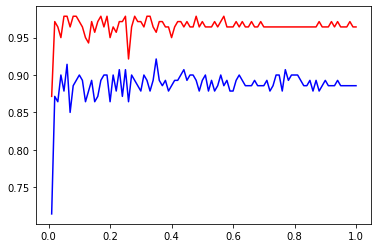

In [156]:
from matplotlib import pyplot as plt
plt.plot(threshs, nbacc, 'b')
plt.plot(threshs, lracc, 'r')
plt.show()

c) Repeat part **b** with LR.

Between a generative model (NB) and a discriminative model (LR), which is more affected by small training dataset? Think about a reason for this.

Naive bayes should technically work better with a smaller dataset, as it is a generative model. However, in this case Logistic Regression performs better throughout. This may be because the conditional independence of the features given the output is not satisfied and this is a necessary constraint for NB.

## Problem 5

What is the hyperparameters, the parameters, and the objective function for finding the best hypothesis for each of the following methods:

1. Decision Tree (Entropy gain)
2. Support Vector Machine
3. K-nearest Neighbors Clustering

1. Hyperparameters: Tree height, tree depth
   Parameters: Splitting threshold
   Objective function: min(1/n)summation(yi - F(xi))^2
2. Hyperparameters: the kernel, soft/hard constraints, dimensions
   Parameters: the separating hyperplane
   Objective function: 𝑤𝑇𝑤+𝐶∑𝑖=1𝑙𝜉𝑖. -> 𝑓(𝑥)=𝑤𝑇𝑥+𝑏
3. Hyperparameters: The k in kNN
   Parameters: the voronoi cells that define the clustering
   Objective function: min(summation(xi - Z(xi))^2)
   (minimize inter-cluster distance, maximize intra-cluster distance)